# Part I - Analysis for San Francisco Bay Ford GoBike Service 2019
## by Godswill Alubari

## Introduction
The data consists of information regarding over 183,000 rides made in a bike-sharing system covering the greater San Francisco Bay area. The data features include duration_sec and others such as DateTime, customer type, gender, and some additional variables. Out of 16 specifications 9 are numerical, 2 are datetime, 4 are object type and 1 is boolean type. 



## Preliminary Wrangling


In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

> This data set includes information about rides taking by individuals in a bike-sharing system covering the greater San Francisco Bay area.


The Data contains the following features:

- Trip Duration (seconds)
- Start Time and Date
- End Time and Date
- Start Station ID
- Start Station Name
- Start Station Latitude
- Start Station Longitude
- End Station ID
- End Station Name
- End Station Latitude
- End Station Longitude
- Bike ID
- User Type (Subscriber or Customer – “Subscriber” = Member or “Customer” = Casual)

##  Loading the dataset and taking closer look to see if any wrangling and cleaning is needed

In [2]:
# Loading the Dataset in dataframe using pd.read_csv
ride_df = pd.read_csv('201902-fordgobike-tripdata.csv')

In [3]:
# Loading to see the first five rows of the dataset
ride_df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


In [4]:
# Loading to see the last five rows of the dataset
ride_df.tail()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
183407,480,2019-02-01 00:04:49.7240,2019-02-01 00:12:50.0340,27.0,Beale St at Harrison St,37.788059,-122.391865,324.0,Union Square (Powell St at Post St),37.788300,-122.408531,4832,Subscriber,1996.0,Male,No
183408,313,2019-02-01 00:05:34.7440,2019-02-01 00:10:48.5020,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,66.0,3rd St at Townsend St,37.778742,-122.392741,4960,Subscriber,1984.0,Male,No
183409,141,2019-02-01 00:06:05.5490,2019-02-01 00:08:27.2200,278.0,The Alameda at Bush St,37.331932,-121.904888,277.0,Morrison Ave at Julian St,37.333658,-121.908586,3824,Subscriber,1990.0,Male,Yes
183410,139,2019-02-01 00:05:34.3600,2019-02-01 00:07:54.2870,220.0,San Pablo Ave at MLK Jr Way,37.811351,-122.273422,216.0,San Pablo Ave at 27th St,37.817827,-122.275698,5095,Subscriber,1988.0,Male,No
183411,271,2019-02-01 00:00:20.6360,2019-02-01 00:04:52.0580,24.0,Spear St at Folsom St,37.789677,-122.390428,37.0,2nd St at Folsom St,37.785000,-122.395936,1057,Subscriber,1989.0,Male,No


In [5]:
# Getting the info of the dataset to see if any feature need dtype change.
ride_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
duration_sec               183412 non-null int64
start_time                 183412 non-null object
end_time                   183412 non-null object
start_station_id           183215 non-null float64
start_station_name         183215 non-null object
start_station_latitude     183412 non-null float64
start_station_longitude    183412 non-null float64
end_station_id             183215 non-null float64
end_station_name           183215 non-null object
end_station_latitude       183412 non-null float64
end_station_longitude      183412 non-null float64
bike_id                    183412 non-null int64
user_type                  183412 non-null object
member_birth_year          175147 non-null float64
member_gender              175147 non-null object
bike_share_for_all_trip    183412 non-null object
dtypes: float64(7), int64(2), object(7)
memory usage: 22.4+ MB


In [6]:
# Get the shape of the Dataset
ride_df.shape

(183412, 16)

In [7]:
# Checking for Null Values
ride_df.isna().sum()

duration_sec                  0
start_time                    0
end_time                      0
start_station_id            197
start_station_name          197
start_station_latitude        0
start_station_longitude       0
end_station_id              197
end_station_name            197
end_station_latitude          0
end_station_longitude         0
bike_id                       0
user_type                     0
member_birth_year          8265
member_gender              8265
bike_share_for_all_trip       0
dtype: int64

In [8]:
# Getting the summary statistics of the Dataset
ride_df.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,member_birth_year
count,183412.000000,183215.000000,183412.000000,183412.000000,183215.000000,183412.000000,183412.000000,183412.000000,175147.000000
mean,726.078435,138.590427,37.771223,-122.352664,136.249123,37.771427,-122.352250,4472.906375,1984.806437
std,1794.389780,111.778864,0.099581,0.117097,111.515131,0.099490,0.116673,1664.383394,10.116689
min,61.000000,3.000000,37.317298,-122.453704,3.000000,37.317298,-122.453704,11.000000,1878.000000
25%,325.000000,47.000000,37.770083,-122.412408,44.000000,37.770407,-122.411726,3777.000000,1980.000000
50%,514.000000,104.000000,37.780760,-122.398285,100.000000,37.781010,-122.398279,4958.000000,1987.000000
75%,796.000000,239.000000,37.797280,-122.286533,235.000000,37.797320,-122.288045,5502.000000,1992.000000
max,85444.000000,398.000000,37.880222,-121.874119,398.000000,37.880222,-121.874119,6645.000000,2001.000000


## Data Wrangling

### Here is a summary of my data cleaning process

- Converted each feature to the appropriate data type
- Converted the time column to DateTime and extracted the hour, day
- Removed entries with missing values

In [9]:
# making a copy of the actual dataset 
df = ride_df.copy()

In [10]:
# Using For loop to convert the date related columns from object into datetime 

dates = ['start_time', 'end_time']
for date in dates:
    df[date] = pd.to_datetime(df[date])
    
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
duration_sec               183412 non-null int64
start_time                 183412 non-null datetime64[ns]
end_time                   183412 non-null datetime64[ns]
start_station_id           183215 non-null float64
start_station_name         183215 non-null object
start_station_latitude     183412 non-null float64
start_station_longitude    183412 non-null float64
end_station_id             183215 non-null float64
end_station_name           183215 non-null object
end_station_latitude       183412 non-null float64
end_station_longitude      183412 non-null float64
bike_id                    183412 non-null int64
user_type                  183412 non-null object
member_birth_year          175147 non-null float64
member_gender              175147 non-null object
bike_share_for_all_trip    183412 non-null object
dtypes: datetime64[ns](2), float64(7), int64(2), object(5)
memory us

In [11]:
# Dropping null values as part of cleaning process
df.dropna(inplace=True)

In [12]:
df['start_day'] = df['start_time'].dt.day_name()
df['start_hour'] = df['start_time'].dt.hour

df['end_day'] = df['end_time'].dt.day_name()
df['end_hour'] = df['end_time'].dt.hour

In [13]:
days = [ 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Use pandas.astype() to convert the "start_day" column from a plain object type into an ordered categorical type 
StartdayClasses = pd.api.types.CategoricalDtype(ordered=True, categories=days)
df['start_day'] = df['start_day'].astype(StartdayClasses);

# Use pandas.astype() to convert the "end_day" column from a plain object type into an ordered categorical type
df['end_day'] = df['end_day'].astype(StartdayClasses);

In [14]:
# Creating a column for  actual Age naming it 'Age': which is gotten by subtracting the years from 2019.
df['Age'] = 2019 - df['member_birth_year']

In [15]:
# Converting the age column into int dtype

df['Age'] = df['Age'].astype(int)

In [16]:
# Asserting all this wrangling above works

df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,...,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,start_day,start_hour,end_day,end_hour,Age
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,...,4902,Customer,1984.0,Male,No,Thursday,17,Friday,8,35
2,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,...,5905,Customer,1972.0,Male,No,Thursday,12,Friday,5,47
3,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,...,6638,Subscriber,1989.0,Other,No,Thursday,17,Friday,4,30
4,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,...,4898,Subscriber,1974.0,Male,Yes,Thursday,23,Friday,0,45
5,1793,2019-02-28 23:49:58.632,2019-03-01 00:19:51.760,93.0,4th St at Mission Bay Blvd S,37.770407,-122.391198,323.0,Broadway at Kearny,37.798014,...,5200,Subscriber,1959.0,Male,No,Thursday,23,Friday,0,60


In [17]:
df.tail(3)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,...,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,start_day,start_hour,end_day,end_hour,Age
183409,141,2019-02-01 00:06:05.549,2019-02-01 00:08:27.220,278.0,The Alameda at Bush St,37.331932,-121.904888,277.0,Morrison Ave at Julian St,37.333658,...,3824,Subscriber,1990.0,Male,Yes,Friday,0,Friday,0,29
183410,139,2019-02-01 00:05:34.360,2019-02-01 00:07:54.287,220.0,San Pablo Ave at MLK Jr Way,37.811351,-122.273422,216.0,San Pablo Ave at 27th St,37.817827,...,5095,Subscriber,1988.0,Male,No,Friday,0,Friday,0,31
183411,271,2019-02-01 00:00:20.636,2019-02-01 00:04:52.058,24.0,Spear St at Folsom St,37.789677,-122.390428,37.0,2nd St at Folsom St,37.785000,...,1057,Subscriber,1989.0,Male,No,Friday,0,Friday,0,30


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174952 entries, 0 to 183411
Data columns (total 21 columns):
duration_sec               174952 non-null int64
start_time                 174952 non-null datetime64[ns]
end_time                   174952 non-null datetime64[ns]
start_station_id           174952 non-null float64
start_station_name         174952 non-null object
start_station_latitude     174952 non-null float64
start_station_longitude    174952 non-null float64
end_station_id             174952 non-null float64
end_station_name           174952 non-null object
end_station_latitude       174952 non-null float64
end_station_longitude      174952 non-null float64
bike_id                    174952 non-null int64
user_type                  174952 non-null object
member_birth_year          174952 non-null float64
member_gender              174952 non-null object
bike_share_for_all_trip    174952 non-null object
start_day                  174952 non-null category
start_hour      

In [19]:
df.shape

(174952, 21)

### What is the structure of your dataset?

> The data consists of information regarding over 183,000 rides made in a bike-sharing system covering the greater San Francisco Bay area. The data features include duration_sec and others such as DateTime, customer type, gender, and some additional variables.
Out of 16 specifications 9 are numerical, 2 are datetime, 4 are object type and 1 is boolean type.

### What is/are the main feature(s) of interest in your dataset?

> I'm most interested in figuring out how trip duration is affected
 by other features of the dataset 
> In this investigation, I looked at how the duration of trips changes with respect to DateTime and customer type. The main focus was on hours of the day, days of the week and customer type.
> When are most trips taken in terms of time of day, day of the week?
> How long does the average trip take?
> Does the above depend on if a user is a subscriber or customer?


### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> I expect that trip duration to be highly dependent on how far the stations are apart, Age should affect duration of trips and also number of rides taken. I also think user_type and gender and year of birth should also effect trip duration.

## Univariate Exploration

I'm starting by investigating the features of interest individually.

## Question: How does age affect duration_sec.

### Creating histogram for duration_sec and Age, since they are both numeric variable.

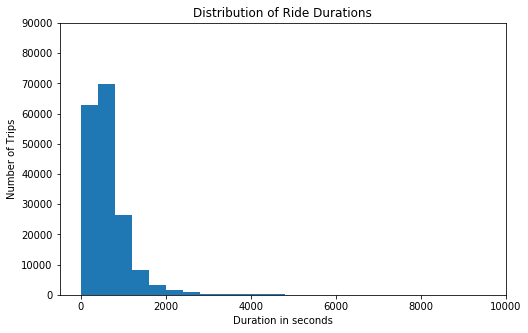

In [20]:
# Scaling the histogram plot
binsize = 400
bins = np.arange(0, df['duration_sec'].max()+binsize, binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = df, x = 'duration_sec', bins = bins)
plt.title('Distribution of Ride Durations')
plt.xlabel('Duration in seconds')
plt.ylabel('Number of Trips')
plt.axis([-500, 10000, 0, 90000])
plt.show()

### Observation

> There is a long tail in the distribution implying high skewness so lets apply log transformation.
Befor log transformation, the data is roughly unimodal, with a large peak somewhere between 0 and 1000 secs.

/opt/conda/lib/python3.6/site-packages/matplotlib/axes/_base.py:2923: UserWarning: Attempted to set non-positive xlimits for log-scale axis; invalid limits will be ignored.
  'Attempted to set non-positive xlimits for log-scale axis; '


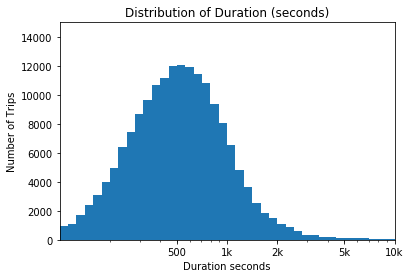

In [21]:
# Applying log transformation on the dataset to see a better view of our plot
log_binsize = 0.05
log_bins = 10 ** np.arange(2.0, np.log10(df['duration_sec'].max()) + log_binsize, log_binsize)
plt.hist(data = df, x = 'duration_sec', bins = log_bins)
plt.xlabel('Duration seconds')
plt.xscale('log')
plt.ylabel('Number of Trips')
plt.title('Distribution of Duration (seconds)')
plt.xticks([500, 1e3, 2e3, 5e3, 1e4], [500, '1k', '2k', '5k', '10k'])
plt.axis([0, 10000, 0, 15000])
plt.show()

### Observation
> Trip duration is mostly concentrated on the smaller values of the duration seconds. Most are less than 2000 seconds with peak around 600-800 seconds. Trip duration values first increases starting from around 1000 values at 0 to 12000 values at around 600 but then starts to fall and moving below 2000 values under 2000 sec.

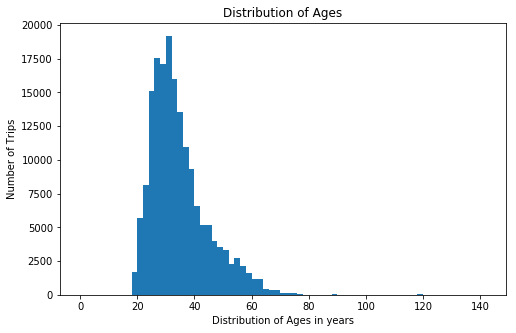

In [22]:
# Making Age plot distribution using Histogram
# start with a standard-scaled plot
binsize = 2
bins = np.arange(0, df['Age'].max()+binsize, binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = df, x = 'Age', bins = bins)
plt.title('Distribution of Ages')
plt.xlabel('Distribution of Ages in years')
plt.ylabel('Number of Trips')
plt.show()

### Observation

> There is a long tail in the plot above implying high skewness. The data is roughly unimodal, with a large peak somewhere between 20 and 40 years.

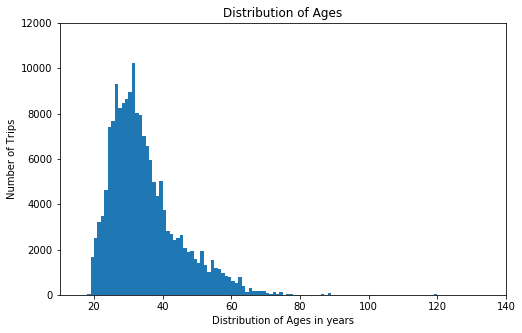

In [23]:
# Making Age plot distribution using Histogram
binsize = 1
bins = np.arange(0, df['Age'].max()+binsize, binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = df, x = 'Age', bins = bins)
plt.axis([10, 140, 0, 12000])
plt.title('Distribution of Ages')
plt.xlabel('Distribution of Ages in years')
plt.ylabel('Number of Trips')
plt.show()

## Observation

> We can see that the distribution is more concentrated between 20 to 40 years old. This implies those in younger age group take more time riding bikes than those older.

## Question: When are most trips taken in terms of time of day?

> Ride Frequency by hours

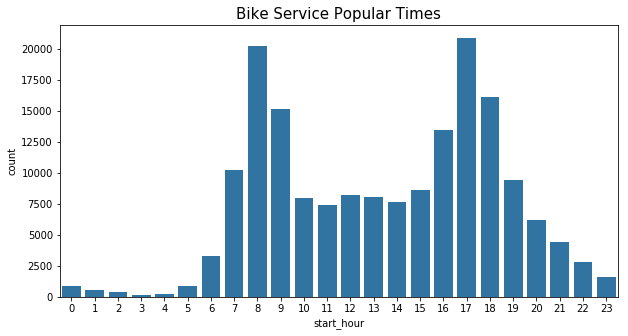

In [28]:
hour_order = np.arange(0,24)
base_color = sb.color_palette()[0]

# Univariate plot
# A plot showing the hours with the most rides.
plt.figure(figsize=(10,5))
plt.title('Bike Service Popular Times', fontsize=15)
ax = sb.countplot(data=df, x='start_hour', order=hour_order, color=base_color);

## Observation
>The time range with the highest rides occur between 8-9th hour which depict early morning and 17-18th hour which depict evening. The higher ride frequencies for morning (8th and 9th hours) and evening (17th and 18th hours) can be automatically correlated to rush hours where people leave for work and come back later in the evening.

## Question: Which user type is the most common in occurence.

### User type analysis: Checking the Count of Subscribers and Customer and then converting it into a plot.

In [29]:
# using .value_counts() to make a count on the category of user_type
df['user_type'].value_counts()

Subscriber    158386
Customer       16566
Name: user_type, dtype: int64

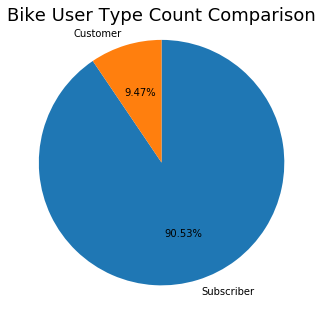

In [31]:
# Pie chart representation of the user_type feature.
plt.figure(figsize=(7,5))
sorted_user_type = df['user_type'].value_counts()
plt.pie(sorted_user_type, labels = sorted_user_type.index, startangle = 90,
        counterclock = False, autopct='%1.2f%%');
plt.axis('square')
plt.title('Bike User Type Count Comparison', fontsize=18);

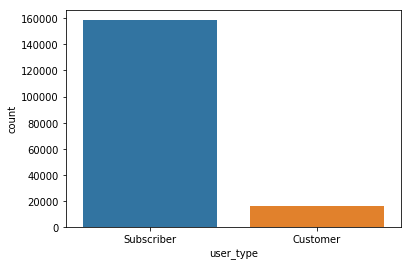

In [34]:
# bar chart representation using sns.countplot() to see the most common user_type
sb.countplot(data=df, x='user_type', order=sorted_user_type.index);

## Observation
>From the total entry of 174952 row left after null value removal in 2019 data, Subscriber is  9 times more than the Customer user type.
> - Subscriber    :158386
> - Customer       :16566

## Question: When are most trips taken in terms of day of the week?

- Ride counts by days

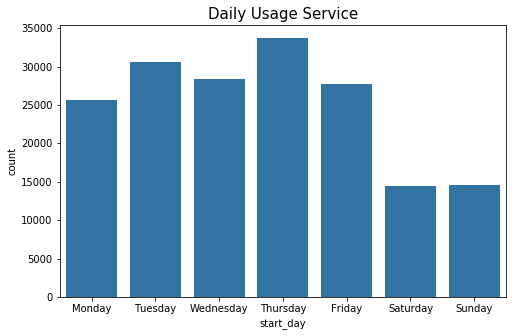

In [37]:
# Since start_day is a categorical feature, a bar chart representation depicting day with the highest amount of ride is the best option

plt.figure(figsize=(8,5))
plt.title('Daily Usage Service', fontsize=15)
sb.countplot(data=df, x='start_day', color=base_color);

### Question: Which of the days of the week has the highest Duration seconds on average.

In [38]:
# Grouping by 'start_day' to find the days with the highest duration seconds on average.
df.groupby('start_day')['duration_sec'].mean()

start_day
Monday       696.970906
Tuesday      652.839459
Wednesday    665.127946
Thursday     678.289748
Friday       681.274699
Saturday     849.771750
Sunday       858.673649
Name: duration_sec, dtype: float64

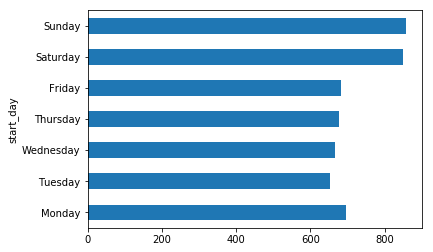

In [39]:
# Create a bar chart to see which of the weekdays recorded the highest duration seconds on average.
df.groupby('start_day')['duration_sec'].mean().plot(kind='barh', color=base_color)

## Observation

> Most rides were taken on Thursdays and Tuesdays. Weekends have the lowest ride records which actually does make sense as weekends are regarded as days people dont really go to work. On average(mean) weekends recorded the highest duration seconds while their is really no big difference on average time duration for trip with respect to the weekdays.

 ## Question: Which member_gender occurs the most.

In [40]:
# Making a count on the member_gender using .value_counts()
df.member_gender.value_counts()

Male      130500
Female     40805
Other       3647
Name: member_gender, dtype: int64

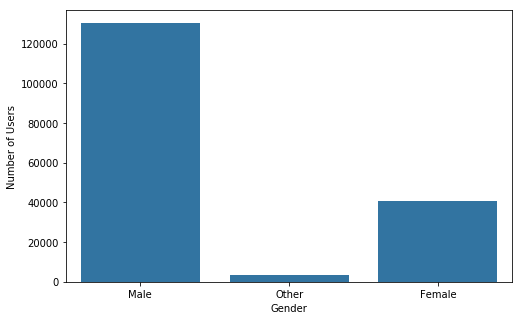

In [42]:
# plotting genders on bar.
plt.figure(figsize=[8,5])
sb.countplot(data=df, x='member_gender', color=base_color)
plt.xlabel('Gender')
plt.ylabel('Number of Users')
plt.show()

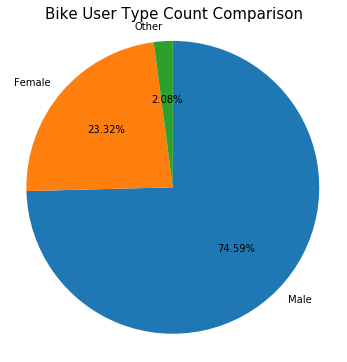

In [43]:
# Pie chart representation of the member_gender feature.
plt.figure(figsize=(8,6))
sorted_counts = df['member_gender'].value_counts()
plt.pie(sorted_counts, labels = sorted_counts.index, startangle = 90,
        counterclock = False, autopct='%1.2f%%');
plt.axis('square')
plt.title('Bike User Type Count Comparison', fontsize=15);

## Observation
> From the plot above it is shown that most bike riders are male while the second most are female. The least riders are those in the 'other' category. Male riders are three times more than the female riders and thirty-five times more than the 'other' category riders.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?¶
The trip duration takes a large amount of values and is concentrated to a tail so I looked at it in log transform and found that peak occurs at 600 seconds starting from 0 and then distribution starts to reduce drastically and does not regain any other peak value.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?
Birth year column was created by substracting the individual year from current year(2019) so this gives us a perfect age distibution, this action is performed as age gives a better explanation as to see the relationship between duration_sec and Age. Age distribution was then plotted.

## Bivariate Exploration

## Question: What age range occurs with highest value of duration_sec.

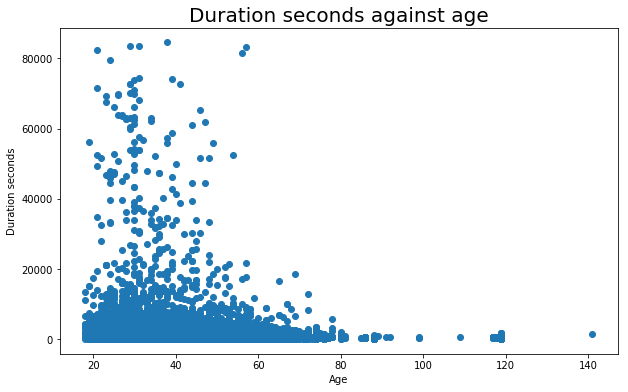

In [59]:
# Plot of duration_sec vs Age
plt.figure(figsize=(10,6))
plt.title('Duration seconds against age', fontsize=20)
plt.scatter(data=df, x='Age', y='duration_sec')
plt.xlabel('Age')
plt.ylabel('Duration seconds');

## Observation

> The plot above depicts exactly that showing that those within 15-50 years of age took more rides than those above 50 years. Looking at plot it can be deduce that most frequent users of bikes are aged between 15 and 50. Indicating younger members clocked Higher duration in seconds .

### Checking which of the days of the week has the highest Duration seconds on average.

In [44]:
# Grouping by 'start_day' to find the days with the highest duration seconds on average.
df.groupby('start_day')['duration_sec'].mean()

start_day
Monday       696.970906
Tuesday      652.839459
Wednesday    665.127946
Thursday     678.289748
Friday       681.274699
Saturday     849.771750
Sunday       858.673649
Name: duration_sec, dtype: float64

In [49]:
# Creating a Function to plot Box plot, to show a relationship between categorical variables and numerical variable
# Making a boxplot to see if our estimation from above was valid.
def boxplot_outliers_plot(x, y):
    plt.figure(figsize=(10,6))
    sb.boxplot(x, y, data=df, color=base_color);

### Outliers are to much in the Dataset, applying masking to reduce the outlier so a clearer diagram can be shown.

In [50]:
# Making a boxplot to see if our estimation from above was valid but ensuring outliers were removed.
def boxplot_outliers_removed(x, y):
    plt.figure(figsize=(10,6))
    # Using masking to remove outliers
    sb.boxplot(x, y, data=df[df['duration_sec'] < 2000], color=base_color);

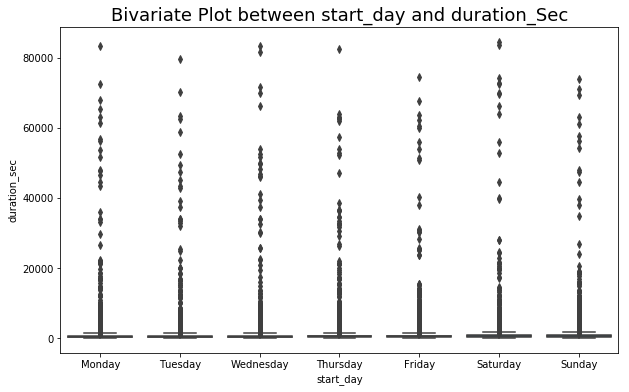

In [51]:
boxplot_outliers_plot(x='start_day', y='duration_sec')
plt.title('Bivariate Plot between start_day and duration_Sec', size=18);

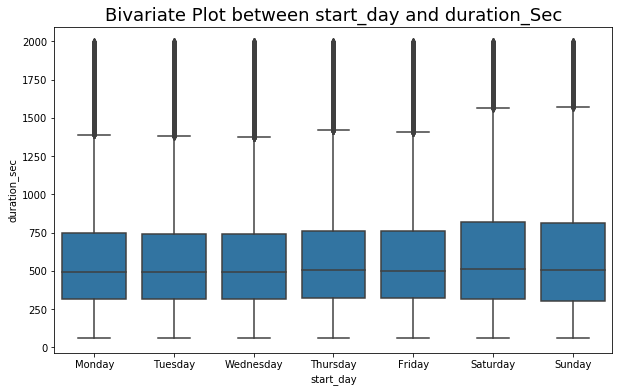

In [52]:
boxplot_outliers_removed(x='start_day', y='duration_sec')
plt.title('Bivariate Plot between start_day and duration_Sec', size=18);

## Observation

>Weekends recorded the highest duration seconds on average while their is really no big difference on average time duration for trip with respect to the weekdays.

### User type vs Duration seconds

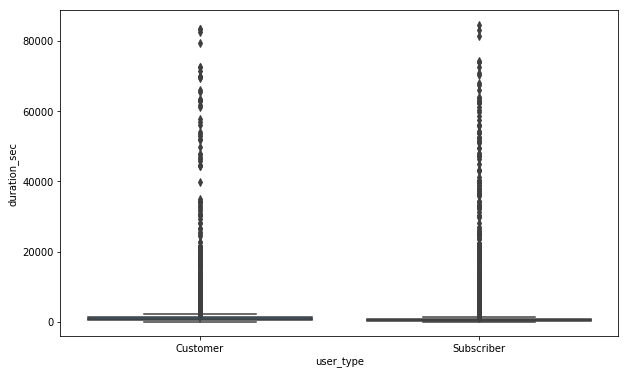

In [53]:
boxplot_outliers_plot(x = 'user_type', y = 'duration_sec')

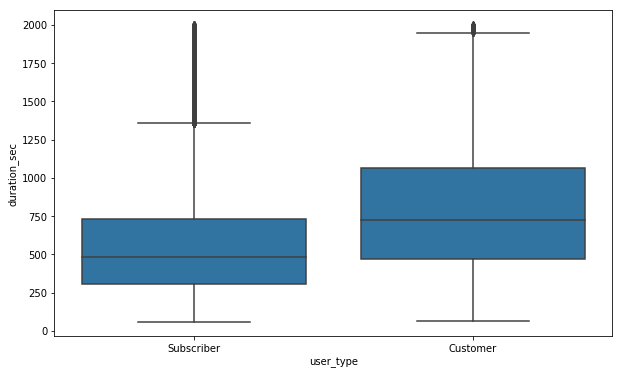

In [54]:
boxplot_outliers_removed(x = 'user_type', y = 'duration_sec')

> Even though subscriber count was much as compared to Customer, from the plot above we can see that higher percentage of customers are taking longer trips when compared to subscribers. Indicating Customer trips take a longer duration on average than subscriber user type.

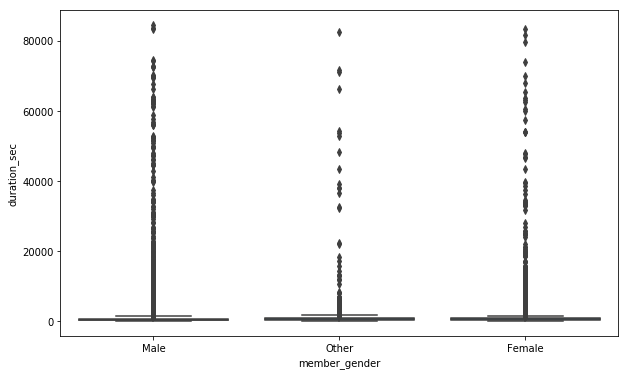

In [56]:
boxplot_outliers_plot(x='member_gender', y='duration_sec')

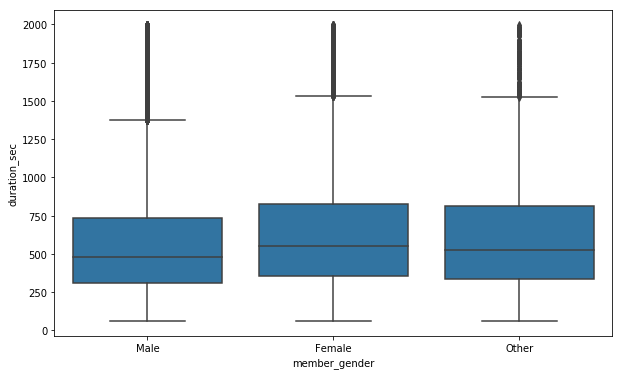

In [55]:
boxplot_outliers_removed(x='member_gender', y='duration_sec')

> Though quantity of male riders count are much compared to the other two member_gender categories, we can see from the plot that higher percentage of 'female' and 'other' rides longer trips than males on average. Female gender trips take a longer duration on average than 'male' or 'other' gender categories.

## Question: What's the connection between user_type and bike_share_for_all_trip

### User type vs bike sharing for trips

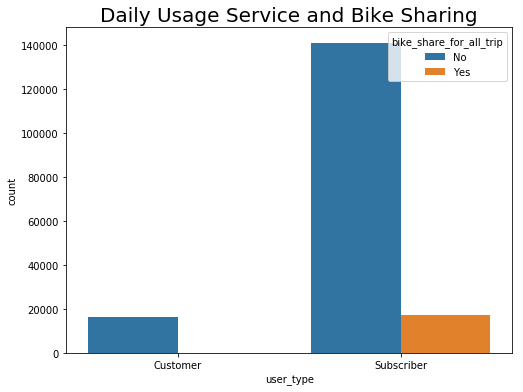

In [58]:
plt.figure(figsize=(8,6))
plt.title('Daily Usage Service and Bike Sharing', fontsize=20)
sb.countplot(data=df, x='user_type', hue='bike_share_for_all_trip');

## Observation

> We can deduce from the charts above that bike sharing is only available to subscribers and customer type doesn’t really affect the number of trips in any week day as they look all the same. And the subscribers undergo more trips on Thursdays and Tuesdays.

## Question: Which of the days of the week do user_type has the highest amount of rides

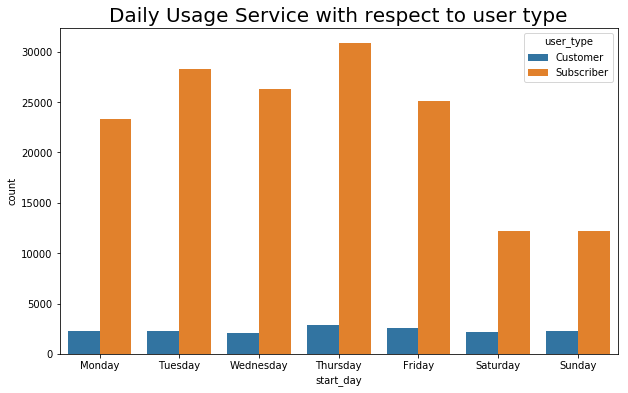

In [61]:
plt.figure(figsize=(10,6))
plt.title('Daily Usage Service with respect to user type', fontsize=20)
sb.countplot(data=df, x='start_day', hue='user_type');

## Observation

> Subscribers take more rides on hourly basis as compared to customers.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?
Trip Duration is very dependendable on the age of the member, which I had anticipated. User_type also affected duration_sec.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?
I expected that categorial variables like `user_type` and `gender` features having higher values should have higher trip duration but from analysis it was shown to go the other way round for example, `gender`, value of `male` members is higher than that of `female` and `others` but the percentage of female members to take longer trips on is higher.

## Multivariate Exploration

### Scatter plot between Age and Duration seconds coloring each point as member_gender

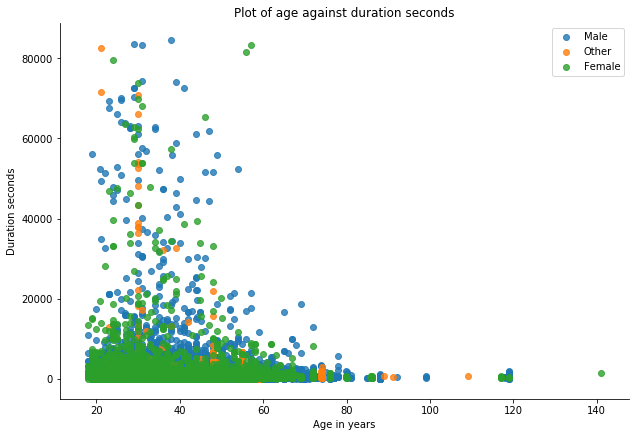

In [64]:
# Making a scatter plot of age and duration seconds coloring all points based on member_gender
g = sb.FacetGrid(data=df, hue='member_gender', size=6, aspect=1.5)
g.map(sb.regplot, 'Age', 'duration_sec', x_jitter=0.04, fit_reg=False)
plt.xlabel('Age in years') 
plt.ylabel('Duration seconds')
plt.title('Plot of age against duration seconds')
plt.legend();

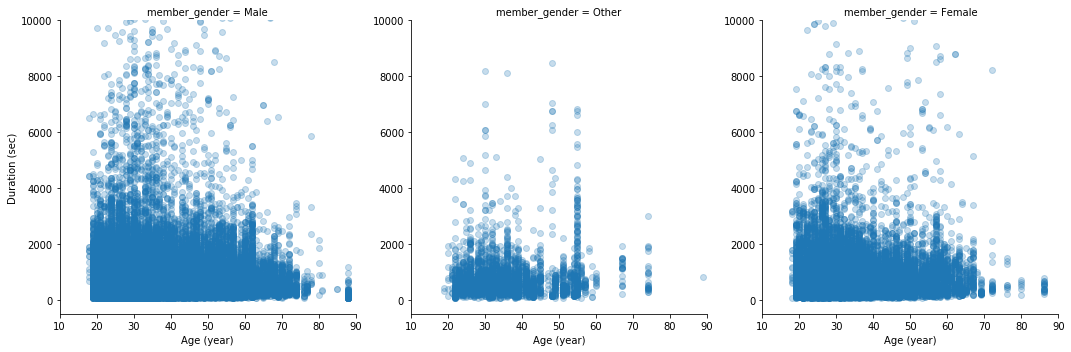

In [66]:
# Splitting the plot above into distinct plot based on categories.

g = sb.FacetGrid(data = df, col = 'member_gender', size = 5,  
                  sharey=False, sharex=False,
                  xlim = [10, 90], ylim = [-500, 10000])
g.map(plt.scatter, 'Age', 'duration_sec', alpha=0.25)
g.set_xlabels('Age (year)')
g.set_ylabels('Duration (sec)')

plt.show()

## Observation

> From the three separated plot above it can be shown that the age range with the highest Duration seconds for rides are within 20-50 years of age. As for the male and female category we can see a strong slopy reduction in duration as the age of the member increases.

### Scatter plot between Age and Duration seconds using user_type as size to differentiate the categorical variables.

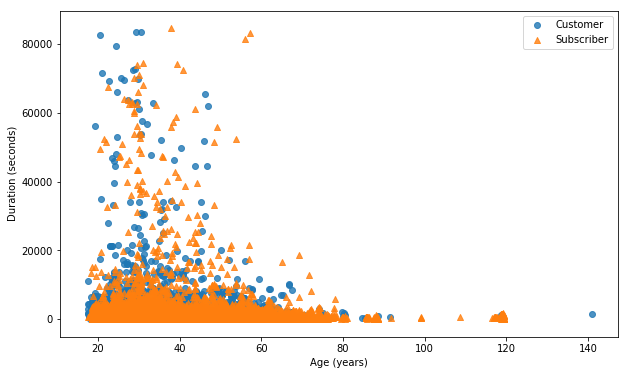

In [67]:
# Shape representation of user_type in a scatter plot between age and duration seconds.
ttype_markers = [['Customer','o'], ['Subscriber', '^']]
plt.figure(figsize=(10, 6))
for ttype, marker in ttype_markers:
    plot_data = df.loc[df['user_type'] == ttype]
    sb.regplot(data = plot_data, y = 'duration_sec', x = 'Age',
               x_jitter=0.5, marker=marker, fit_reg=False);
plt.xlabel('Age (years)')
plt.ylabel('Duration (seconds)')
plt.legend(['Customer', 'Subscriber']);

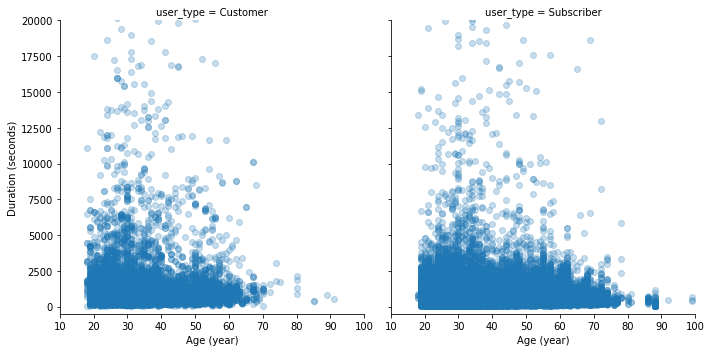

In [68]:
g = sb.FacetGrid(data = df, col = 'user_type', col_wrap = 2, size = 5,
                 xlim = [10, 100], ylim = [-500, 20000])
g.map(plt.scatter, 'Age', 'duration_sec', alpha=0.25)
g.set_xlabels('Age (year)')
g.set_ylabels('Duration (seconds)')

plt.show()

## Observation

In this case both Customer and Subscriber are showing similer trends for age and trip duration. But there is slight tilt to higher age for subscribers.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?
> We observed that though the number of higher duration trip is higher for 'male' but percentage with higher duration seconds is higher for 'women' and 'other', also 'other' has one more peak at nearly the age of 60 years for higher duration time. For different user types both are showing similer trends for age and trip duration. But there is slight tilt to higher age for subscribers.

### Were there any interesting or surprising interactions between features?

> A second duration peak for 'other' gender at extreme old age is baffling as compared to the analysis noted before.

## Conclusions

This analysis project focus on exploring and analyzing the "201902-fordgobike-tripdata.csv" dataset which is a dataset of bike ride with multiple features and the objective of the analysis is figuring out the factors that affects the time durations of each trips. This requires adequate visualizations so as to shed light on relationships between features and draw insights from the visualizations.

More than 10 visualization plots are generated followed by observations from each plot provided after each plot so as to communicate adequately what's derived from the charts and the message to put mind to from the charts.

Our principal feature of interest is the duration_sec. Other features explored are Age which was derived by subtracting each member year of birth from 2019, user_type, start_station_name, end_station_name, member_gender, hours(Hours of the day) and bike_share_for_all_trip.


### Some of the insights derived from the analysis are listed below:

The type of user has an influence on the use of this service. There are quite a lot of differences here and there, such as: 

- Age
> The age range between 15-50 have the highest duration seconds, indicating that as the age increases the duration second reduces.


- Days of the week
> Most rides were taken on Thursdays and Tuesdays. Weekends have the lowest ride records which actually makes sense as weekends are regarded as work off days.

- Hour of the day
> Most rides were taken between 8th-9th hours and 17th-18th hours. The higher ride frequencies for the morning (8th and 9th hrs) and evening (17th and 18th hrs) can be related to rush hours where people leave for work and come back later in the evening.

- User Type
> Though we have higher number of subscribers as compared to customers, still higher percentage of customers are taking longer trips when compared to subscribers.
> It was also shown that bike sharing is available to only subscribers. And the subscribers undergo more trips on Thursdays and Tuesdays.